In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")


In [2]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import h5py
import PIL
import pandas as pd
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Conv2DTranspose,Conv2D,Conv2DTranspose,BatchNormalization,Input,ReLU,Add,Lambda,LeakyReLU,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow import Tensor
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import random

from importlib import reload 
from monk import Dataset
   
from PIL import Image 
import PIL 
  


In [3]:
import ncut_loss

import build_Unet

import build_Wnet

import getData

from datasets import get_damaged_generator

from datasets import get_non_damaged_generator

from datasets import get_mixed_generator

import seaborn as sns

import pandas as pd

from getData import get_generator


In [4]:
#TRAIN_DATASET= ["/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/door_batch_0.json","/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/door_batch_1.json"]

TEST_DATASET= ["/shared/perso/nicolas/Projets/Classifieur_idea/idea_data_train/door_batch_3.json"]



damaged_generator = get_generator(TEST_DATASET,10,256,damaged=True)

non_damaged_generator = get_generator(TEST_DATASET,10,256,damaged=False)



In [5]:
damaged_samples = damaged_generator.__getitem__(5)

In [6]:
damaged_samples[0].shape

TensorShape([10, 256, 256])

In [7]:
damaged_samples[1].shape

TensorShape([10, 256, 256])

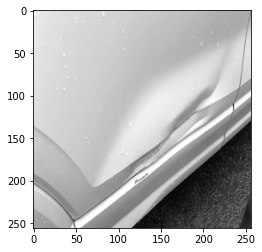

In [25]:
plt.imshow(damaged_samples[0][6],cmap='gray')

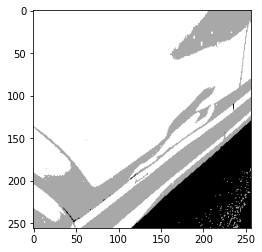

In [24]:
plt.imshow(damaged_samples[1][6],cmap='gray')

In [10]:
damaged_samples[1][2]

<tf.Tensor: shape=(256, 256), dtype=float32, numpy=
array([[-0.21568628,  0.4509804 ,  0.4509804 , ..., -0.21568628,
        -0.21568628, -0.21568628],
       [ 0.4509804 ,  0.4509804 ,  0.4509804 , ..., -0.21568628,
        -0.21568628, -0.21568628],
       [ 0.4509804 ,  0.4509804 ,  0.4509804 , ..., -0.21568628,
        -0.21568628, -0.21568628],
       ...,
       [-0.7490196 , -0.7490196 , -0.7490196 , ..., -0.7490196 ,
        -0.7490196 , -0.7490196 ],
       [-0.7490196 , -0.7490196 , -0.7490196 , ..., -0.7490196 ,
        -0.7490196 , -0.7490196 ],
       [ 0.4509804 ,  0.4509804 ,  0.4509804 , ..., -0.7490196 ,
        -0.7490196 , -0.7490196 ]], dtype=float32)>

In [11]:
damaged_samples[0].shape

TensorShape([10, 256, 256])

In [12]:
encoder = build_Unet.Unet(K=1,type='decoder',input_size=256,do_dropout=False,l1_reg=0,l2_reg=0)

In [13]:
a = tf.expand_dims(damaged_samples[1][0],2)
b =  tf.expand_dims(a,0)


In [14]:
res = encoder(b)

UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above. [Op:Conv2D]